**1**. (25 points)

We provide a simple tree represented as nested Python dictionaries. Write a recursive function `visit(t)` that will print the value of the `v` key for all nodes in a tree, using indentation to show off the tree structure. For example,

```python
visit(t)
```
should return
```
  1234
    2345
      3456
      4567
    5678
      6789
```

In [1]:
t = {
        'v': 1234,
        'l': {
            'v': 2345,
            'l': {
                'v': 3456,
                'l': None,
                'r': None
            },
            'r':{
                'v': 4567,
                'l': None,
                'r': None
            },
        },
        'r': {
            'v': 5678,
            'l': None,
            'r': {
                'v': 6789,
                'l': None,
                'r': None
            },
        }
    }

In [2]:
def visit(t, indent = 0):
    """Recursive function to print contents of a tree."""
    
    if t is None:
        return
    indent += 2
    for k in t:
        if k == 'v':
            print(' '*indent + str(t.get(k)))
        else:
            visit(t.get(k), indent=indent)

In [3]:
visit(t)

  1234
    2345
      3456
      4567
    5678
      6789


In [4]:
visit(t['l'])

  2345
    3456
    4567


**2**. (25 points)

- Read the file `wnv_human_cases.csv` as a `pandas` DataFrame
- Add up the positive cases for each year
- Find the week in the year when there are the highest average cases of West Nile virus reported
- Which county reported the highest number of cases in that week and what year did it happen?
- Using the total cases per year, plot the original data and a rolling average with window length of 3 and minimum period of 1 on the same plot

In [5]:
%matplotlib inline

In [6]:
import pandas as pd

In [7]:
wnv = pd.read_csv('wnv_human_cases.csv')

In [8]:
wnv.head()

,Year,Week Reported,County,Positive Cases
0,2006,35,Alameda,1
1,2006,33,Butte,4
2,2006,34,Butte,1
3,2006,35,Butte,10
4,2006,36,Butte,2


In [9]:
wnv.groupby('Year')['Positive Cases'].sum()

Year
2006    272
2007    380
2008    445
2009    112
2010    111
2011    158
2012    479
2013    379
2014    801
2015    782
2016    442
2017    553
2018    217
2019     98
Name: Positive Cases, dtype: int64

In [10]:
wnv.groupby('Week Reported')['Positive Cases'].mean().sort_values(ascending=False).head(1)

Week Reported
41    3.708333
Name: Positive Cases, dtype: float64

In [11]:
wnv[wnv['Week Reported'] == 41].sort_values('Positive Cases', ascending=False).head(1)

,Year,Week Reported,County,Positive Cases
1642,2017,41,Los Angeles,40


In [12]:
ts = wnv.groupby('Year')['Positive Cases'].sum()

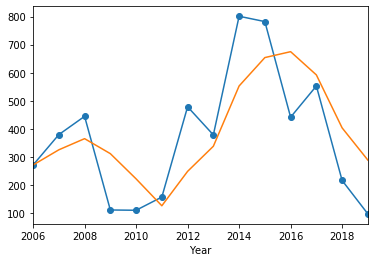

In [13]:
ts.plot(marker='o')
ts.rolling(3, min_periods=1).mean().plot()
pass

**3**. 25 points

- Create a `pandas` DataFrame from the data in `yuck.csv`
- When done, your DataFame should look like the one in `less_yuck.csv`

In [14]:
%%file yuck.csv
% This is my CSV file
% I like comments
first,last,age
% first is first naem, last is last name, age is as of 1 Jan 2019
"Driehe","Dietriech, von",23
"Ahmad","Ibrahim, bin",34

% I like to mix separators
Charles,Blow,57
Andrew:Carnegie:87

% This is the last entry
Amy,Good,12


Overwriting yuck.csv


In [15]:
pd.read_csv('less_yuck.csv')

,first,last,age
0,Driehe,"Dietriech, von",23
1,Ahmad,"Ibrahim, bin",34
2,Charles,Blow,57
3,Andrew,Carnegie,87
4,Amy,Good,12


In [16]:
import csv

In [17]:
with open('yuck.csv') as f:
    good_lines = []
    for line in csv.reader(f):
        if not line:
            continue # skip empty lists
        elif line[0][0] == '%':
            continue # skip comment lines
        elif len(line) == 1:
            line = line[0].split(':') # try alternative separator
            if len(line) == 3:
                good_lines.append(line)
        else:
            good_lines.append(line)

In [18]:
df = pd.DataFrame(good_lines[1:], columns=good_lines[0])

**4**. (25 points)

Use the SQLite3 database `faculty.db` and answer the following query:

- Make a table of the number of people who know each language from each country, making sure to spell out the full name of the country and language, only showing rows with a count of at least 5
- The final solution should look like `country_language.csv`

In [19]:
pd.read_csv('country_language.csv')

,country,language,number
0,China,PHP,10
1,Cambodia,Bash,10
2,Cambodia,C#,8
3,Cambodia,Ceylon,8
4,Cambodia,Java,10
5,Cambodia,Perl,12
6,Cambodia,Racket,8
7,Cambodia,Ruby,8
8,Cambodia,TypeScript,8


In [20]:
%load_ext sql

In [21]:
%sql sqlite:///faculty.db

'Connected: @faculty.db'

In [22]:
%%sql

SELECT * FROM sqlite_master WHERE type=='table'

 * sqlite:///faculty.db
Done.


type,name,tbl_name,rootpage,sql
table,person,person,2,"CREATE TABLE person ( ""index"" BIGINT, person_id BIGINT, first TEXT, last TEXT, age BIGINT, height FLOAT, weight BIGINT, country_id TEXT, gender_id BIGINT)"
table,confidential,confidential,18,"CREATE TABLE confidential ( ""index"" BIGINT, person_id BIGINT, salary BIGINT)"
table,person_language,person_language,33,"CREATE TABLE person_language ( ""index"" BIGINT, person_id BIGINT, language_id BIGINT)"
table,language,language,50,"CREATE TABLE language ( ""index"" BIGINT, language_id BIGINT, language_name TEXT)"
table,gender,gender,55,"CREATE TABLE gender ( ""index"" BIGINT, gender_id BIGINT, gender TEXT)"
table,country,country,57,"CREATE TABLE country ( ""index"" BIGINT, country_id TEXT, country TEXT, nationality TEXT)"


In [23]:
%%sql
SELECT country.country, language.language_name AS language, 
    COUNT(DISTINCT person.person_id) AS number
FROM person, country, language, person_language
WHERE person.country_id = country.country_id AND
person.person_id = person_language.person_id AND
person_language.language_id = language.language_id
GROUP BY person.country_id, language_name
HAVING number >= 5

 * sqlite:///faculty.db
Done.


country,language,number
Brazil,ECMAScript,5
Cambodia,Bash,5
Cambodia,Java,5
Cambodia,Perl,6
Costa Rica,Perl,5
Cuba,JavaScript,5
Denmark,AutoIt,6
Finland,Clojure,5
Mexico,JavaScript,5


Alternative using JOIN syntax

In [24]:
%%sql
SELECT country.country, language.language_name AS language,
    COUNT(DISTINCT person.person_id) AS number
FROM person
JOIN country
ON person.country_id = country.country_id
JOIN person_language
ON person.person_id = person_language.person_id
JOIN language
ON person_language.language_id = language.language_id
GROUP BY person.country_id, language_name
HAVING number >= 5

 * sqlite:///faculty.db
Done.


country,language,number
Brazil,ECMAScript,5
Cambodia,Bash,5
Cambodia,Java,5
Cambodia,Perl,6
Costa Rica,Perl,5
Cuba,JavaScript,5
Denmark,AutoIt,6
Finland,Clojure,5
Mexico,JavaScript,5
